In [1]:
!pip install --upgrade google-api-python-client

In [2]:
!pip install google-cloud-vision

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    #print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  './data/ocr_python/my_google_api_key.json'






total 39776
-rw-r--r--   1 woogyuchoi  staff  5385090 Dec  9 12:35 Augmentation.ipynb
-rw-r--r--   1 woogyuchoi  staff       11 Dec  1 00:28 README.md
-rw-r--r--   1 woogyuchoi  staff    57890 Dec  1 00:28 [E-01]rock_scissor_paper.ipynb
-rw-r--r--   1 woogyuchoi  staff    52721 Dec  1 00:28 [E-02] iris.ipynb
-rw-r--r--   1 woogyuchoi  staff   978601 Dec  1 00:28 [E-03]FaceSticker.ipynb
-rw-r--r--   1 woogyuchoi  staff    41906 Dec  1 00:28 [E-04]poetry.ipynb
-rw-r--r--@  1 woogyuchoi  staff  1986116 Dec 15 00:45 [E-05]celeb_Face.ipynb
-rw-r--r--   1 woogyuchoi  staff   966828 Dec  1 00:28 [E-06]kaggle1.ipynb
-rw-r--r--@  1 woogyuchoi  staff   130922 Dec 15 00:36 [E-07]movie_text.ipynb
-rw-r--r--   1 woogyuchoi  staff   122074 Dec 14 23:12 [E-07s]movie_text.ipynb
-rw-r--r--   1 woogyuchoi  staff       72 Dec 16 14:57 [E-08]portrait-jvsc-32a64a2d-7398-4bc8-bc7d-75406c1d684c.ipynb
-rw-r--r--   1 woogyuchoi  staff   773287 Dec 15 01:04 [E-08]portrait.ipynb
-rw-r--r--   1 woogyuchoi  staff 

['./data/OCR2/던킨도너츠.png', './data/OCR2/미니스톱.png', './data/OCR2/배스킨BR라빈스.png', './data/OCR2/스타벅스1.png', './data/OCR2/스타벅스2.png', './data/OCR2/아비꼬.png', './data/OCR2/올리브영.png', './data/OCR2/이니스프리.png', './data/OCR2/파리바게트.png', './data/OCR2/파스쿠찌.png']


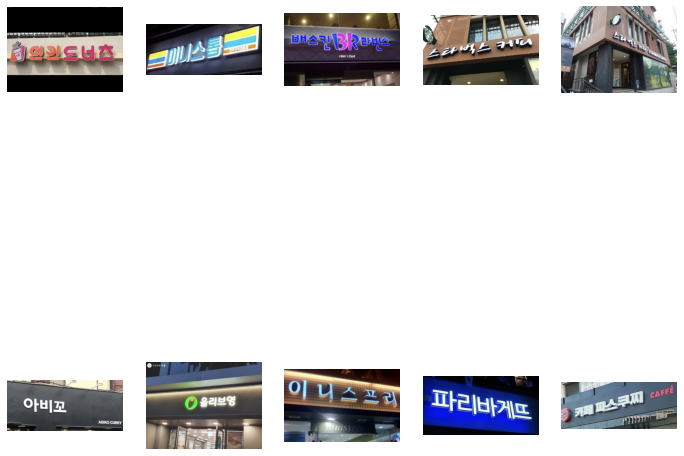

In [5]:
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline

folder_path = './data/OCR2'
file_list = sorted(os.listdir('./data/OCR2'))
file_list = file_list[1:]
file_list
image_path = [os.path.join(folder_path, file) for file in file_list]
print(image_path)

plt.figure(figsize= (12,12))
for i, img in enumerate(image_path):
    temp_img = Image.open(img)
    
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(temp_img)


Texts:

"DD
"

"DD"


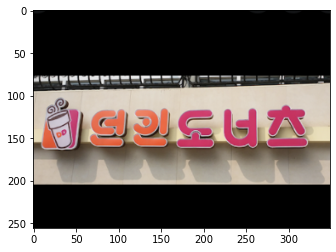

In [6]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.

temp_img = Image.open(image_path[0])
plt.imshow(temp_img)
detect_text(image_path[0])


# 한글은 불가능함!

In [7]:
folder_path = './data/OCR'
file_list = sorted(os.listdir(folder_path))
file_list


['coffeelover.jpg',
 'keepcalm.jpg',
 'keepsmilingandcarryon.jpg',
 'love.jpg',
 'make-the-day-great!.jpg',
 "season'sgreetings.jpg",
 'thankyou.jpg']

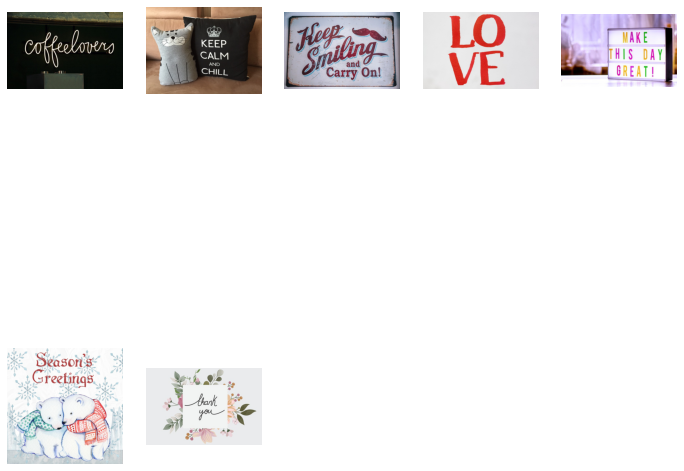

In [8]:
image_path = [os.path.join(folder_path, file) for file in file_list]
plt.figure(figsize= (12,12))
for i, img in enumerate(image_path):
    temp_img = Image.open(img)
    
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(temp_img)

In [9]:
image_path

['./data/OCR/coffeelover.jpg',
 './data/OCR/keepcalm.jpg',
 './data/OCR/keepsmilingandcarryon.jpg',
 './data/OCR/love.jpg',
 './data/OCR/make-the-day-great!.jpg',
 "./data/OCR/season'sgreetings.jpg",
 './data/OCR/thankyou.jpg']

Texts:

"Cov
vers
"

"Cov"

"vers"
Texts:

"KEEP
CALM
AND
CHILL
"

"KEEP"

"CALM"

"AND"

"CHILL"
Texts:

"Heep
Smiling
and
Carry On!
"

"Heep"

"Smiling"

"and"

"Carry"

"On!"
Texts:

"LO
VE
"

"LO"

"VE"
Texts:

"MAKE
THIS DAY
GREAT!
"

"MAKE"

"THIS"

"DAY"

"GREAT!"
Texts:

"Skason's
Greetings.
"

"Skason's"

"Greetings."
Texts:

"bank
you
"

"bank"

"you"


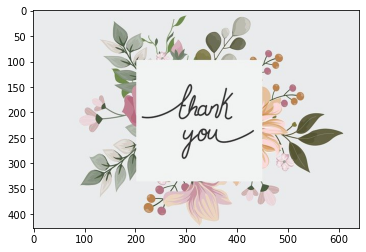

In [10]:
for path in image_path:
    temp_img = Image.open(path)
    plt.imshow(temp_img)
    detect_text(path)
    

Texts:

"Cov
vers
"

"Cov"

"vers"


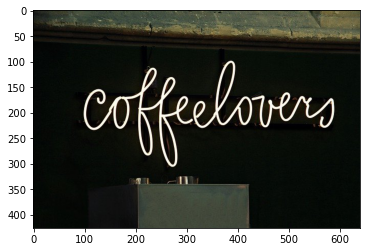

In [11]:
temp_img = Image.open(image_path[0])
plt.imshow(temp_img)
detect_text(image_path[0])

Texts:

"KEEP
CALM
AND
CHILL
"

"KEEP"

"CALM"

"AND"

"CHILL"


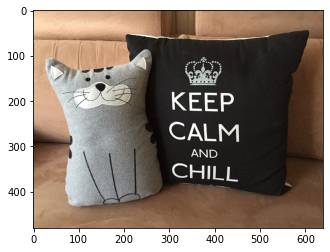

In [12]:
temp_img = Image.open(image_path[1])
plt.imshow(temp_img)
detect_text(image_path[1])

Texts:

"Heep
Smiling
and
Carry On!
"

"Heep"

"Smiling"

"and"

"Carry"

"On!"


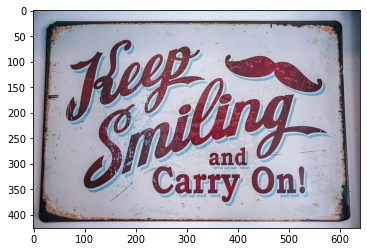

In [13]:
temp_img = Image.open(image_path[2])
plt.imshow(temp_img)
detect_text(image_path[2])

Texts:

"LO
VE
"

"LO"

"VE"


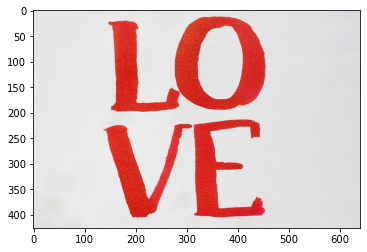

In [14]:
temp_img = Image.open(image_path[3])
plt.imshow(temp_img)
detect_text(image_path[3])

# Keras


In [5]:
import matplotlib.pyplot as plt
import keras_ocr
from PIL import Image 
%matplotlib inline
import os

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [6]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 

folder_path = os.getenv('HOME')+'/aiffel/OCR/'
file_list = sorted(os.listdir(folder_path))
print(file_list)

image_path = [os.path.join(folder_path, file) for file in file_list]

images = [ keras_ocr.tools.read(url) for url in image_path]
prediction_groups = [pipeline.recognize([url]) for url in image_path]

['coffeelover.jpg', 'keepcalm.jpg', 'keepsmilingandcarryon.jpg', 'love.jpg', 'make-the-day-great!.jpg', "season'sgreetings.jpg", 'thankyou.jpg']


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


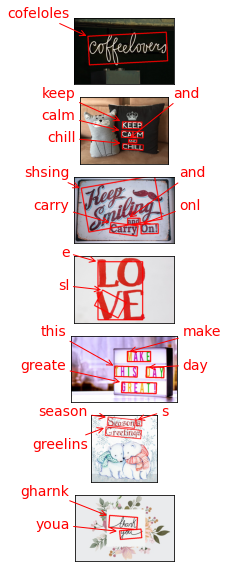

In [7]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 10))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 테서렉트

In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")
    

In [9]:
work_dir = os.getenv('HOME')+'/aiffel/OCR'
img_file_path = work_dir + '/coffeelover.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)


/aiffel/aiffel/OCR/0000.png
/aiffel/aiffel/OCR/0001.png
/aiffel/aiffel/OCR/0002.png
/aiffel/aiffel/OCR/0003.png
/aiffel/aiffel/OCR/0004.png


In [10]:
recognize_images(cropped_image_path_list)



=




}


7272 lclcCcCcmcccC—“—O*®™COCOsOC(‘(ORNRNNNNNNNNOOt‘(RN mys


Done


In [11]:
work_dir = os.getenv('HOME')+'/aiffel/OCR'
img_file_path = work_dir + '/keepcalm.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/OCR/0000.png


In [12]:
recognize_images(cropped_image_path_list)



Done


In [15]:
work_dir = os.getenv('HOME')+'/aiffel/OCR'
img_file_path = work_dir + '/keepsmilingandcarryon.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)



/aiffel/aiffel/OCR/0000.png


In [16]:
recognize_images(cropped_image_path_list)



Done


# 회고

 1 한글을 인식 해보도록 하였는데 모든 OCR 프로그램이 작동하는것은 아니여서 영어 데이터셋으로 변경하였다.
 
 2 다른사물과 같이있는 그림. 필기체 , 기울어진 사진등을 이용하여 평가하도록 하였다.
킵컴앤칠 유명한 문구의 경우

구글 ocr : 

"KEEP"

"CALM"

"AND"

"CHILL"

케라스 :
keep calm and chill
테서렉트:



 
구글이 가장 정확한 결과를 나타낸다. 

테서렉트는 사용법이굉장히 어려워서 난감했다.
